<a href="https://colab.research.google.com/github/chutimaq/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

8


<Figure size 432x288 with 0 Axes>

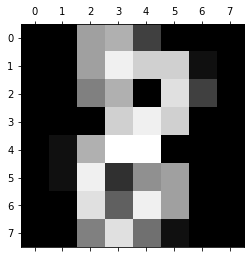

In [3]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz 3 March
- แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ random_state = 9
- หา parameters ที่ดีที่สุด (K (1,3,5) Distance_weighted (yes/no) ด้วย 10-cross-validation
- test parameters ที่ดีที่สุด กับ test data

#### - แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ random_state = 9

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1437, 64) (1437,)
Testing set shape: (360, 64) (360,)


#### - หา parameters ที่ดีที่สุด (K (1,3,5) Distance_weighted (yes/no) ด้วย 10-cross-validation

##### with distance_weighted

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Define the distance-weighted k-NN classifier with different values of k
k_values = [1, 3, 5]
classifiers = [KNeighborsClassifier(n_neighbors=k, weights='distance') for k in k_values]

# Perform 10-fold cross-validation for each classifier
for i, clf in enumerate(classifiers):
    scores = cross_val_score(clf, digits.data, digits.target, cv=10)
    print("K =", k_values[i], "Accuracy:", scores.mean())

K = 1 Accuracy: 0.9749627560521414
K = 3 Accuracy: 0.9771849782743638
K = 5 Accuracy: 0.9716294227188081


##### without distance_weighted

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Define the k values to use
k_values = [1, 3, 5]

# Perform 10-fold cross-validation for each value of k
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(clf, digits.data, digits.target, cv=10)
    print("K =", k, "Accuracy:", scores.mean())

K = 1 Accuracy: 0.9749627560521414
K = 3 Accuracy: 0.9766325263811299
K = 5 Accuracy: 0.9716294227188081


with dw

K = 1 Accuracy: 0.9749627560521414

K = 3 Accuracy: 0.9771849782743638

K = 5 Accuracy: 0.9716294227188081

without dw

K = 1 Accuracy: 0.9749627560521414

K = 3 Accuracy: 0.9766325263811299

K = 5 Accuracy: 0.9716294227188081

# เลือก k 3 with distance weighted


#### - test parameters ที่ดีที่สุด กับ test data

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

# Fit a k-NN classifier with k=3 and distance-weighted voting
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)

In [8]:
acc

0.9833333333333333

##เฉลย Quiz 3 March

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=50)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

### model selection

In [12]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9853875291375293
Mean Cross-Validation Score: K3weighted 0.9853875291375293
Mean Cross-Validation Score: K5weighted 0.9853923853923854
Mean Cross-Validation Score: K1NOweighted 0.9853875291375293
Mean Cross-Validation Score: K3NOweighted 0.9853826728826729
Mean Cross-Validation Score: KNOweighted 0.9846930846930848


### Evaluate with test set

In [13]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


Accuracy score:  0.975


# HW 7 
หา โมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets 

## พารามิเตอร์แรก k3 without distance_weight

### k3 without dw Decision Tree

In [15]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Fit a decision tree classifier with max depth = 5
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.6638888888888889


### k3 without dw Naive Bayes

In [16]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Fit a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.8472222222222222


### k3 without dw KNN k neighbor nearest

In [17]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Fit a k-NN classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.9833333333333333


### k3 without dw ANN Artificial neural network

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create an ANN classifier with one hidden layer of 100 neurons
clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the class labels of the test set
pred = clf.predict(X_test)

# Compute the accuracy of the classifier
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.9833333333333333


## พารามิเตอร์สอง k3 with distance_weight

### k3 with dw Decision Tree

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
 #Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the class labels of the test set
dt_pred = dt.predict(X_test)

# Compute the accuracy of the decision tree classifier
dt_acc = dt.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.8416666666666667


### k3 with dw Naive Bayes

In [20]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Predict the class labels of the test set
nb_pred = nb.predict(X_test)

# Compute the accuracy of the Naive Bayes classifier
nb_acc = nb.score(X_test, y_test)
print("Naive Bayes Accuracy:", nb_acc)

Naive Bayes Accuracy: 0.8472222222222222


### k3 with dw KNN k neighbor nearest

In [21]:
# Create a k-NN classifier with k=3 and distance weighting
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the class labels of the test set
knn_pred = knn.predict(X_test)

# Compute the accuracy of the k-NN classifier
knn_acc = knn.score(X_test, y_test)
print("k-NN Accuracy:", knn_acc)

k-NN Accuracy: 0.9833333333333333


### k3 with dw ANN Artificial neural network

In [22]:
# Create an ANN classifier with one hidden layer of 100 neurons
ann = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Fit the classifier to the training data
ann.fit(X_train, y_train)

# Predict the class labels of the test set
ann_pred = ann.predict(X_test)

# Compute the accuracy of the ANN classifier
ann_acc = ann.score(X_test, y_test)
print("ANN Accuracy:", ann_acc)

ANN Accuracy: 0.9833333333333333
